Generates plots of (x,y,z) coordinates for which f_n > alpha_n.

In [437]:
%run constants.ipynb
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm, ListedColormap, BoundaryNorm

In [438]:
def read(n):
    '''
    Reads coordinates and their corresponding f_n - alpha_n values 
    from file, and returns them as parallel lists.
    '''
    with open(COORDS_FILE(n)) as fp:
        lines = fp.readlines()
        lines = [tuple(line.strip().split(',')) for line in lines]
        lines = [(int(x), int(y), float(fval), int(z)) for x,y,fval,z in lines]
    return zip(*lines)  # unzip into parallel lists

In [439]:
# For each n, we have discrete f_n - alpha_n values
# from collections import Counter
# Counter(fvals)

In [440]:
def plot_coordinates(n, ax):
    '''
    Scatter-plots the coordinates for the given `n` on the given axis.
    '''
    xs, ys, fvals, _ = tuple(read(n))
    
    fval_counts = Counter(fvals)
    base_cmap = plt.get_cmap('GnBu')
    cmap = ListedColormap(base_cmap(np.linspace(0,1, len(fval_counts))))
    norm = BoundaryNorm(sorted(list(fval_counts.keys())), cmap.N)
    # color map based on the f_n - alpha_n values
    scatter = ax.scatter(xs, ys, s=0.01,
                         c=fvals, cmap=cmap, norm=norm)
    return scatter

In [441]:
def set_ax_template(n, ax):
    '''
    Sets the general axis template for either version.
    '''
    ax.set_title(f'n={n}')
    ax.grid(visible=True)
    ax.set_aspect(0.6)

## xy version

In [442]:
def subplot_f_xyz(n, ax):
    '''
    Subplot for the XY version.
    '''
    scatter = plot_coordinates(n, ax)
    
    xlim = (1, XYZ_SUM//3)
    ylim = (2, XYZ_SUM//2)    
    x_vals = np.linspace(*xlim)
    bnd1 = x_vals
    # y < 2000-x-y -> y < (2000-x)/2
    bnd2 = (XYZ_SUM - x_vals)/2
    
    bound1, = ax.plot(x_vals, bnd1, linestyle='--', color='red', 
                      label='x=y')
    bound2, = ax.plot(x_vals, bnd2, linestyle='--', color='red', 
                      label=f'y=({XYZ_SUM}-x)/2')
    
    ax.annotate('x=y', fontsize=12, color='red', 
               xy=(0.3, 0.14), xycoords='axes fraction')
    ax.annotate(f'y=({XYZ_SUM}-x)/2', fontsize=12, color='red', 
               xy=(0.64, 0.82), xycoords='axes fraction')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    set_ax_template(n, ax)
    
    return scatter

## yz version

In [443]:
def subplot_f_yzx(n, ax):
    '''
    Subplot for the YZ version.
    '''
    scatter = plot_coordinates(n, ax)
    
    ylim = (2, XYZ_SUM//2)
    zlim = (3, XYZ_SUM-2)
    y_vals = np.linspace(*ylim)
    bnd1 = y_vals  # z = y
    bnd2 = XYZ_SUM - 2*y_vals
    bnd3 = XYZ_SUM - y_vals 
    
    bound1, = ax.plot(y_vals, bnd1, linestyle='--', color='red', 
                      label='y=z')
    bound2, = ax.plot(y_vals, bnd2, linestyle='--', color='red', 
                      label=f'z={XYZ_SUM}-2y')
    bound3, = ax.plot(y_vals, bnd3, linestyle='--', color='red', 
                      label=f'z={XYZ_SUM}-y')
    
    ax.annotate('y=z', fontsize=12, color='red', 
               xy=(0.2, 0.17), xycoords='axes fraction')
    ax.annotate(f'z={XYZ_SUM}-2y', fontsize=12, color='red', 
               xy=(0.64, 0.1), xycoords='axes fraction')
    ax.annotate(f'z={XYZ_SUM}-y', fontsize=12, color='red', 
               xy=(0.64, 0.75), xycoords='axes fraction')
    
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_xlim(ylim)
    ax.set_ylim(zlim)
    set_ax_template(n, ax)
    
    return scatter

In [444]:
def subplot_f(n, ax):
    '''
    Subplot for the given `n` on the given axis.
    '''
    if VERSION == Version.XY:
        return subplot_f_xyz(n, ax)
    elif VERSION == Version.YZ:
        return subplot_f_yzx(n, ax)
    else:
        print("Unknown version")
        exit(1)

In [445]:
def plot_ns(ns):
    '''
    Plot coordinates for which f_n < alpha_n, for the given n values.
    '''
    fig, axs = plt.subplots(len(ns), 1, figsize=(8,18))
    for i in range(len(ns)):
        n = ns[i]
        scatter = subplot_f(n, axs[i])
        # color bar based on f_n - alpha_n values
        cbar = fig.colorbar(scatter, ax=axs[i], 
                           fraction=0.03, pad=0.04)
        cbar.ax.tick_params(labelsize=8)
        cbar.set_label(CBAR_LABEL(n), labelpad=14)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.suptitle(FIG_TITLE, x=0.5, y=0.98, fontsize=16)
    fig.savefig(FIG_NAME, dpi=300, bbox_inches='tight')
    plt.show()

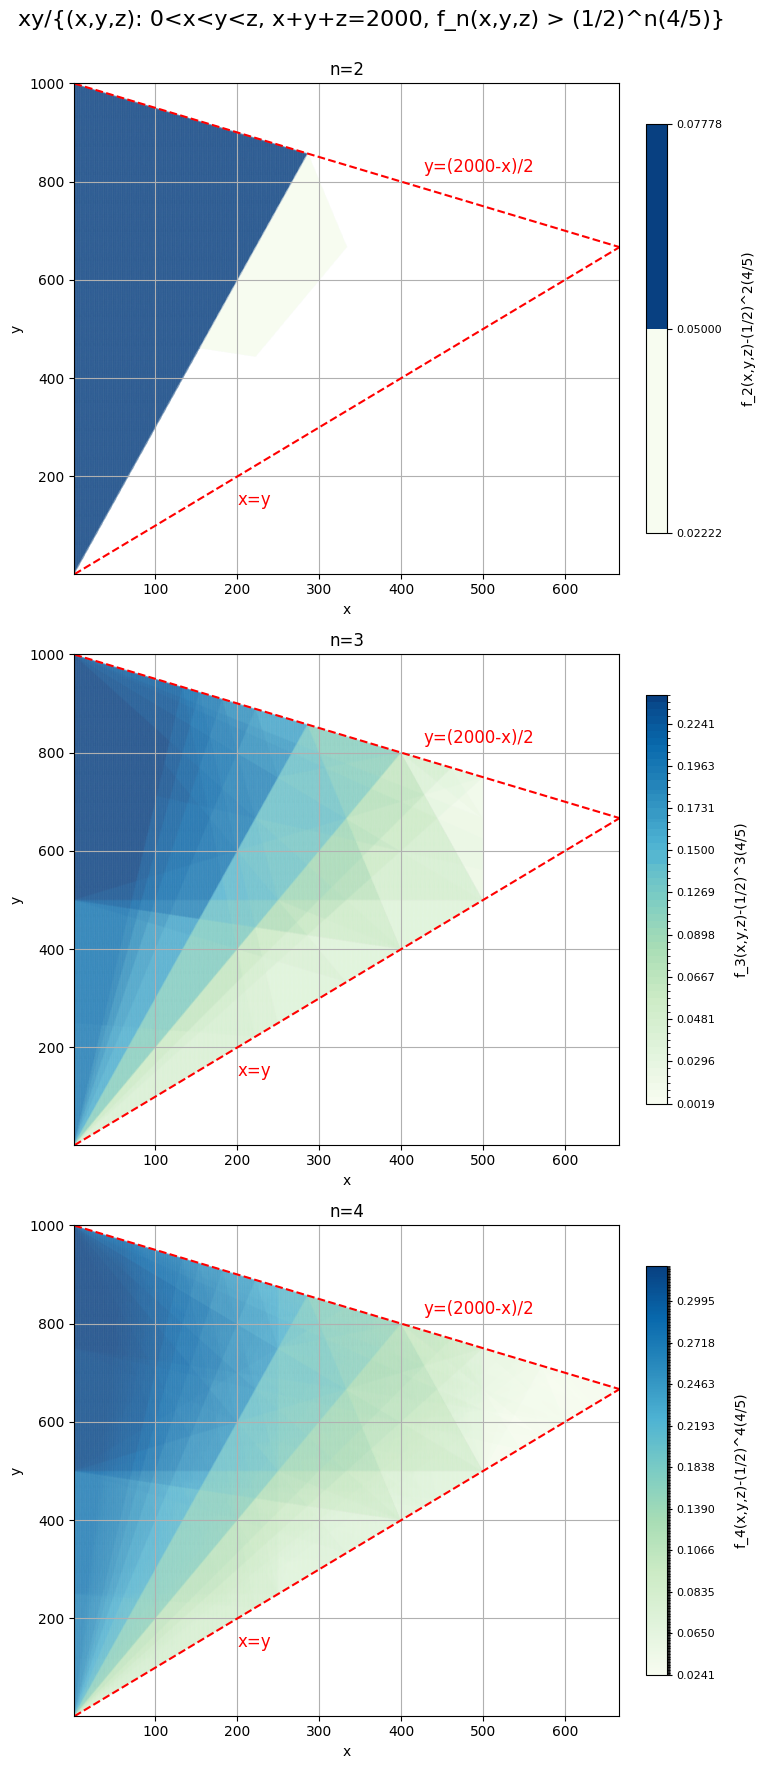

In [446]:
# Uncomment this to plot the figures
plot_ns([2,3,4])